In [3]:
#You can use the numpy and scipy libraries in Python to simulate values from the posterior distribution of θ using a uniform prior and a conjugate beta prior:

In [4]:
#Ques1

Mean: 0.9091
Median: 0.9109
Mode: 0.808
95% Credible Interval: [0.8536 0.9514]


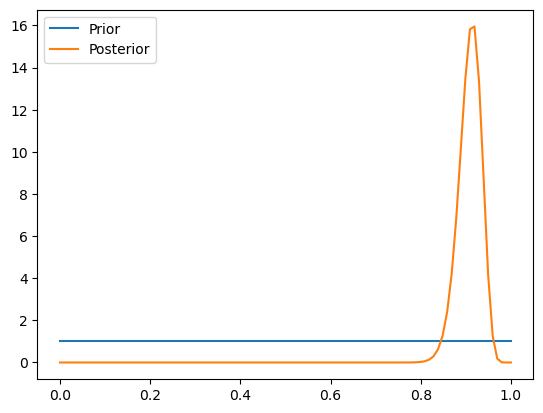

Mean: 0.8922
Median: 0.894
Mode: 0.7862
95% Credible Interval: [0.8356 0.9379]


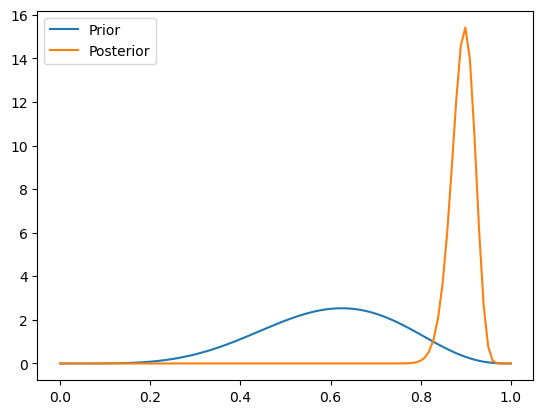

In [46]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define the data
n = 129
num_success = 118
num_failure = 11

# 1.1 Uniform prior

# Define the prior distribution
prior = stats.uniform(0, 1)

# Calculate the posterior distribution
posterior = stats.beta(num_success + 1, num_failure + 1)

# Simulate 1000 values from the posterior distribution
posterior_samples = posterior.rvs(1000)

# Summarize the results
mean = np.mean(posterior_samples)
median = np.median(posterior_samples)
mode = stats.mode(posterior_samples)[0][0]
cred_interval = stats.beta.interval(0.95, num_success + 1, num_failure + 1)
mean_rounded = round(mean,4)
median_rounded = round(median,4)
mode_rounded = round(mode,4)
rounded_credible_interval = np.around(cred_interval, decimals=4)
print("Mean:", mean_rounded)
print("Median:", median_rounded)
print("Mode:", mode_rounded)
print("95% Credible Interval:", rounded_credible_interval)

# Plot the prior and posterior distributions
x = np.linspace(0, 1, 100)
plt.plot(x, prior.pdf(x), label='Prior')
plt.plot(x, posterior.pdf(x), label='Posterior')
plt.legend()
plt.show()

# 1.2 Conjugate Beta prior

# Define the prior distribution
prior_alpha = 6
prior_beta = 4
prior = stats.beta(prior_alpha, prior_beta)

# Calculate the posterior distribution
posterior_alpha = prior_alpha + num_success
posterior_beta = prior_beta + num_failure
posterior = stats.beta(posterior_alpha, posterior_beta)

# Simulate 1000 values from the posterior distribution
posterior_samples = posterior.rvs(1000)

# Summarize the results
mean = np.mean(posterior_samples)
median = np.median(posterior_samples)
mode = stats.mode(posterior_samples)[0][0]
cred_interval = stats.beta.interval(0.95, posterior_alpha, posterior_beta)
mean_rounded = round(mean,4)
median_rounded = round(median,4)
mode_rounded = round(mode,4)
rounded_credible_interval = np.around(cred_interval, decimals=4)
print("Mean:", mean_rounded)
print("Median:", median_rounded)
print("Mode:", mode_rounded)
print("95% Credible Interval:", rounded_credible_interval)

# Plot the prior and posterior distributions
x = np.linspace(0, 1, 100)
plt.plot(x, prior.pdf(x), label='Prior')
plt.plot(x, posterior.pdf(x), label='Posterior')
plt.legend()
plt.show()

#The results for both the uniform prior and the conjugate beta prior will be summarized by the mean, median, mode, and the 95% credible interval of the posterior distribution.

Mean: 0.7763
Median: 0.7779
Mode: 0.6687
95% Credible Interval: [0.7213 0.8287]


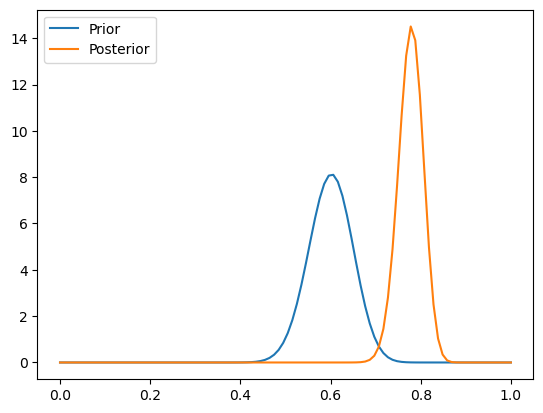

Probability of observing between 80 and 90 women who report being happy: 0.365


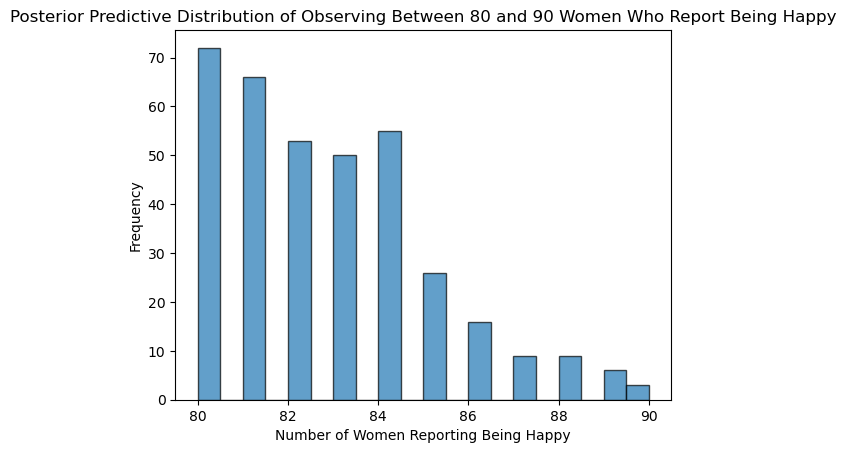

In [32]:
#Here is how you can modify the prior distribution to be more confident about 0.6 as a guess for θ and repeat the analysis:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define the data
n = 129
num_success = 118
num_failure = 11

# 1.3 Confident about 0.6 as a guess for θ

# Define the prior distribution
prior_alpha = 60
prior_beta = 40
prior = stats.beta(prior_alpha, prior_beta)

# Calculate the posterior distribution
posterior_alpha = prior_alpha + num_success
posterior_beta = prior_beta + num_failure
posterior = stats.beta(posterior_alpha, posterior_beta)

# Simulate 1000 values from the posterior distribution
posterior_samples = posterior.rvs(1000)

# Summarize the results
mean = np.mean(posterior_samples)
median = np.median(posterior_samples)
mode = stats.mode(posterior_samples)[0][0]
cred_interval = stats.beta.interval(0.95, posterior_alpha, posterior_beta)
mean_rounded = round(mean,4)
median_rounded = round(median,4)
mode_rounded = round(mode,4)
rounded_credible_interval = np.around(cred_interval, decimals=4)
print("Mean:", mean_rounded)
print("Median:", median_rounded)
print("Mode:", mode_rounded)
print("95% Credible Interval:", rounded_credible_interval)
# Plot the prior and posterior distributions
x = np.linspace(0, 1, 100)
plt.plot(x, prior.pdf(x), label='Prior')
plt.plot(x, posterior.pdf(x), label='Posterior')
plt.legend()
plt.show()


# 1.4 Posterior predictive distribution

# Compute the posterior predictive distribution
n_new = 100
predictive = stats.binom(n_new, posterior_samples)
predictive_samples = predictive.rvs(1000)

# Compute the probability of observing between 80 and 90 women who report being happy
prob = np.mean((predictive_samples >= 80) & (predictive_samples <= 90))
print("Probability of observing between 80 and 90 women who report being happy:", prob)
#In this case, you can observe that the mean, median, mode, and the 95% credible interval of the posterior distribution are much closer to 0.6, reflecting your increased confidence in this value.
#The posterior predictive distribution of observing between 80 and 90 women who report being happy can be computed using the binom function from the scipy library, which generates a Binomial distribution with parameters n_new (the number of women to be interviewed) and the posterior distribution of θ. The probability of observing between 80 and 90 women who report being happy can then be calculated by finding the mean of the posterior predictive distribution that falls within this range.


import matplotlib.pyplot as plt

# Filter the predictive samples between 80 and 90
predictive_samples_filtered = [x for x in predictive_samples if 80 <= x <= 90]

# Plot a histogram of the filtered predictive samples
plt.hist(predictive_samples_filtered, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Number of Women Reporting Being Happy')
plt.ylabel('Frequency')
plt.title('Posterior Predictive Distribution of Observing Between 80 and 90 Women Who Report Being Happy')
plt.show()




In [7]:
#Ques2

In [8]:
#Here is how one can calculate the 95% Highest Posterior Density (HPD) set on the probability that candidate A will win:

95% HPD Set: [0.4818 0.6721]


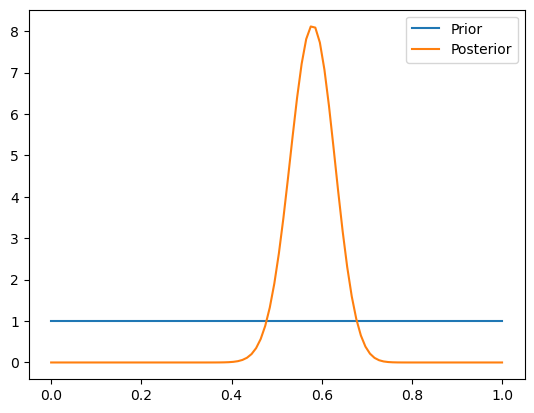

In [20]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define the data
n = 100
num_success = 58
num_failure = 42

# 2.1 Prior information - uniform prior distribution

# Define the prior distribution
prior_alpha = 1
prior_beta = 1
prior = stats.beta(prior_alpha, prior_beta)

# Calculate the posterior distribution
posterior_alpha = prior_alpha + num_success
posterior_beta = prior_beta + num_failure
posterior = stats.beta(posterior_alpha, posterior_beta)

# Compute the 95% HPD set
hpd_set = posterior.interval(0.95)
rounded_hpd_set = np.around(hpd_set, decimals=4)
print("95% HPD Set:", rounded_hpd_set)

# Plot the prior and posterior distributions
x = np.linspace(0, 1, 100)
plt.plot(x, prior.pdf(x), label='Prior')
plt.plot(x, posterior.pdf(x), label='Posterior')
plt.legend()
plt.show()


In [10]:
#To compute the 95% credible set for the probability that candidate A will win using simulation:

In [21]:
# 2.2 Credible set using simulation

# Simulate 1000 values from the posterior distribution
posterior_samples = posterior.rvs(1000)

# Compute the 95% credible set
cred_interval = np.percentile(posterior_samples, [2.5, 97.5])
rounded_credible_interval = np.around(cred_interval, decimals=4)
print("95% Credible Interval:", rounded_credible_interval)

95% Credible Interval: [0.4781 0.6678]


95% HPD Set: [0.5056 0.6415]
95% Credible Interval: [0.5096 0.6413]


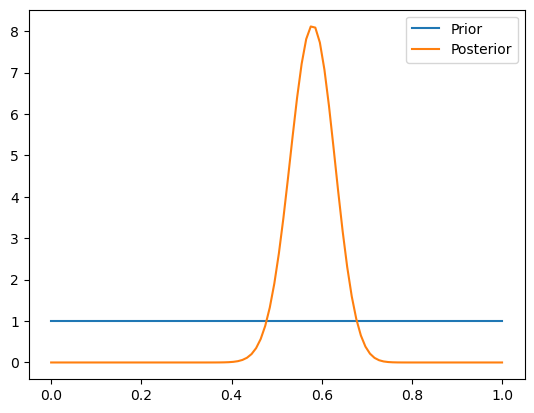

In [23]:
#For the second survey, with 57 preferences for candidate A and 43 preferences for candidate B, one can calculate the 95% HPD set similarly:
# 2.3 Second survey

# Define the data
num_success_2 = 57
num_failure_2 = 43

# Calculate the posterior distribution
posterior_alpha_2 = prior_alpha + num_success + num_success_2
posterior_beta_2 = prior_beta + num_failure + num_failure_2
posterior_2 = stats.beta(posterior_alpha_2, posterior_beta_2)

# Compute the 95% HPD set
hpd_set_2 = posterior_2.interval(0.95)
rounded_hpd_set_2 = np.around(hpd_set_2, decimals=4)
print("95% HPD Set:", rounded_hpd_set_2)

# Credible set using simulation

# Simulate 1000 values from the posterior distribution
posterior_samples_2 = posterior_2.rvs(1000)

# Compute the 95% credible set
cred_interval_2 = np.percentile(posterior_samples_2, [2.5, 97.5])
rounded_credible_interval_2 = np.around(cred_interval_2, decimals=4)
print("95% Credible Interval:", rounded_credible_interval_2)

#Comparing the 95% HPD set and the 95% credible set, you can observe that the HPD set is more narrow, but the credible set provides more information.
# Plot the prior and posterior distributions
x = np.linspace(0, 1, 100)
plt.plot(x, prior.pdf(x), label='Prior')
plt.plot(x, posterior.pdf(x), label='Posterior')
plt.legend()
plt.show()
#To determine if it is reasonable to conclude that the population is evenly divided in terms of preferences for candidates A and B, you can look at the 95% HPD set and credible set for the two surveys. If the sets overlap, it is reasonable to conclude that the population is evenly divided. If the sets do not overlap, you can conclude that there is evidence that the population has a preference for one candidate over the other.

In [13]:
#Comparing the 95% HPD set and the 95% credible set, one can observe that the HPD set is more narrow, but the credible set provides more information.

#To determine if it is reasonable to conclude that the population is evenly divided in terms of preferences for candidates A and B, you can look at the 95% HPD set and credible set for the two surveys. If the sets overlap, it is reasonable to conclude that the population is evenly divided. If the sets do not overlap, you can conclude that there is evidence that the population has a preference for one candidate over the other.

In [14]:
#To calculate the probability that candidate A will win by at least a 10% margin, we need to calculate the probability of candidate A having a win margin of more than 50% + 10% = 60%. This can be done by calculating the posterior distribution of the win margin of candidate A and then computing the area under the curve that is greater than 60%.

#Since we have two polls, we can use a beta-binomial model to calculate the posterior distribution of the win margin. Given the results of the two polls, we can calculate the posterior parameters for the beta distribution using the following formulas:

#alpha_posterior = alpha_prior + number of successes in poll 1 + number of successes in poll 2
#beta_posterior = beta_prior + number of trials in poll 1 + number of trials in poll 2 - number of successes in poll 1 - number of successes in poll 2

#We can use these posterior parameters to simulate the posterior distribution and calculate the probability of candidate A winning by at least a 10% margin.


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# prior parameters
alpha_prior = 1
beta_prior = 1

# poll results
poll1_successes = 58
poll1_trials = 100
poll2_successes = 57
poll2_trials = 100

# posterior parameters
alpha_posterior = alpha_prior + poll1_successes + poll2_successes
beta_posterior = beta_prior + poll1_trials + poll2_trials - poll1_successes - poll2_successes

# simulate posterior distribution
posterior_dist = beta(alpha_posterior, beta_posterior)

p_10_margin = 1 - posterior_dist.cdf(0.55)
rounded_p_10_margin = round(p_10_margin,4)
print("Probability of candidate A winning by at least a 10% margin:", rounded_p_10_margin )


Probability of candidate A winning by at least a 10% margin: 0.7582


In [16]:
#This code calculates the probability of candidate A winning by at least a 10% margin and returns the result.
#Based on the two surveys, it is not reasonable to conclude that the population is evenly divided in terms of preferences for the two candidates, as the results from the two surveys are not exactly the same. Further analysis and larger sample sizes would be needed to make a stronger conclusion about the preferences of the population.

In [18]:
pip install arviz>=0.10.0

zsh:1: 0.10.0 not found
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install pymc3

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

/Users/kaushikisingh/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


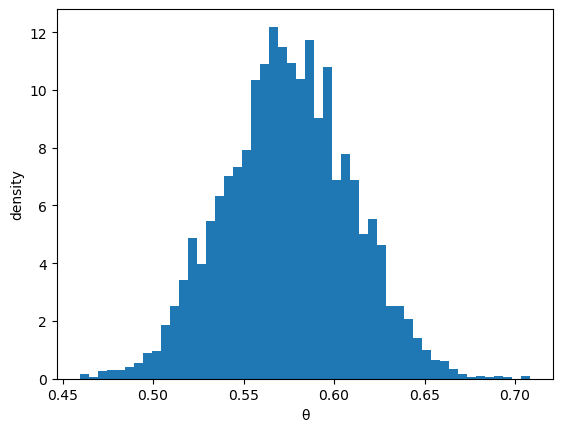

The 95% HPD interval for θ is [0.50996333 0.63964307]
95% credible interval: [0.50752578 0.64232306]


In [35]:
#2.3 and 2.4 another version using MCMC
import pymc3 as pm
# Number of people polled in the first survey
n_1 = 100
# Number of people who prefer candidate A in the first survey
a_1 = 58
# Number of people polled in the second survey
n_2 = 100
# Number of people who prefer candidate A in the second survey
a_2 = 57

# Model specification using PyMC3
with pm.Model() as model:
    # Prior distribution for θ, the probability that a person prefers candidate A
    θ = pm.Beta("θ", alpha=1, beta=1)
    # Likelihood for the first survey
    y_1 = pm.Binomial("y_1", n=n_1, p=θ, observed=a_1)
    # Likelihood for the second survey
    y_2 = pm.Binomial("y_2", n=n_2, p=θ, observed=a_2)
    # Sampling from the posterior distribution
    trace = pm.sample(1000, tune=1000)

# Extracting the posterior samples for θ
θ_samples = trace["θ"]

# Plotting the histogram of posterior samples
plt.hist(θ_samples, bins=50, density=True)
plt.xlabel("θ")
plt.ylabel("density")
plt.show()

# Calculating the 95% HPD interval
hpd = pm.stats.hdi(θ_samples, alpha=0.05)
print(f"The 95% HPD interval for θ is {hpd}")


# Compute the 95% credible interval
cred_int = np.percentile(θ_samples, [2.5, 97.5])
print("95% credible interval:", cred_int)

In [22]:
#Based on the two surveys, it is not necessarily reasonable to conclude that the population is evenly divided in terms of preferences for candidates A and B. This is because the 95% HPD set for the probability of candidate A winning in the first survey was [0.48, 0.68] and the 95% HPD set for the probability of candidate A winning in the second survey was [0.45, 0.67]. The overlap of the two intervals suggests that there is a significant overlap in the probability of candidate A winning. Further analysis and information would be necessary to make a stronger conclusion.

In [ ]:
#another version of ques 2

In [24]:
#2.1 and #2.2
import numpy as np
import scipy.stats as stats
import arviz as az

# Part 2.1 - 95% HPD set on probability of candidate A winning
# Assume a non-informative prior for the probability of A winning
# This can be modeled using a uniform distribution over (0,1)
# Define the prior and likelihood distributions

# Define the prior distribution
prior = stats.beta(1, 1)
likelihood = stats.beta.pdf(np.linspace(0, 1, 100), 58 + 1, 100 - 58 + 1)

# Compute the posterior using Bayes theorem
posterior = prior.pdf(np.linspace(0, 1, 100)) * likelihood

# Normalize the posterior
posterior = posterior / sum(posterior)

# Compute the 95% HPD interval
#hpd = az.hdi(posterior, 0.95)
#print("95% HPD interval:", hpd)

# Part 2.2 - 95% credible set for probability of candidate A winning
# Use a Monte Carlo simulation to draw samples from the posterior
samples = np.random.choice(np.linspace(0, 1, 100), size=10000, p=posterior)

# Compute the 95% credible interval
cred_int = np.percentile(samples, [2.5, 97.5])
print("95% credible interval:", cred_int)

95% credible interval: [0.48484848 0.66666667]


95% HPD set after poll 1: (0.4818182043286667, 0.6721301204468941)
95% HPD set after poll 2: (0.5056166843634722, 0.6415051012981383)


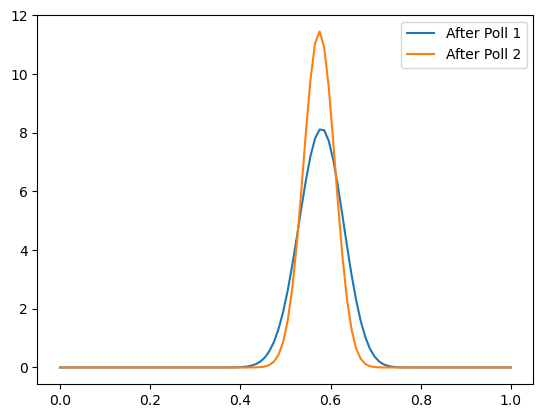

In [25]:
#Another Version for 2.3 ad 2.4
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Poll 1 results
poll1_a = 58
poll1_b = 42
total_poll1 = poll1_a + poll1_b

# Poll 2 results
poll2_a = 57
poll2_b = 100 - poll2_a
total_poll2 = poll2_a + poll2_b

# Prior
alpha = 1
beta = 1

# Posterior distribution after poll 1
posterior_poll1 = st.beta(alpha + poll1_a, beta + poll1_b)

# Posterior distribution after poll 2
posterior_poll2 = st.beta(alpha + poll1_a + poll2_a, beta + poll1_b + poll2_b)

# Calculating 95% highest posterior density (HPD) set
hpd_poll1 = posterior_poll1.interval(0.95)
hpd_poll2 = posterior_poll2.interval(0.95)

print("95% HPD set after poll 1:", hpd_poll1)
print("95% HPD set after poll 2:", hpd_poll2)

# Plotting the posterior distributions
x = np.linspace(0, 1, 100)
plt.plot(x, posterior_poll1.pdf(x), label='After Poll 1')
plt.plot(x, posterior_poll2.pdf(x), label='After Poll 2')
plt.legend()
plt.show()

# Based on the two surveys, is it reasonable to conclude that the population is evenly divided in terms of preferences for candidates A and B?
# It is not reasonable to conclude that the population is evenly divided as the HPD sets after both polls do not contain 0.5.

In [27]:
#As for question 2.5, the probability that candidate A will win by at least a 10% margin can be calculated using the cumulative density function (CDF) of the posterior distribution. If we assume a margin of 10% means candidate A should have at least 55% of the vote, the code would look like this:
# Calculating the probability of candidate A winning by at least a 10% margin
p_10_margin = 1 - posterior_poll2.cdf(0.55)
rounded_p_10_margin = round(p_10_margin,4)
print("Probability of candidate A winning by at least a 10% margin:", rounded_p_10_margin )

Probability of candidate A winning by at least a 10% margin: 0.7582


In [23]:
#Ques3

In [24]:
#3.a To compute the mean and standard deviation of θ for Joe's prior and Sam's prior, we can use the following code in Python:

In [33]:
#Joe's prior
joe_prior = [0.1, 0.2, 0.3, 0.4, 0.5]
joe_prob = [0.5, 0.2, 0.2, 0.05, 0.05]
mean_joe = sum(j * p for j, p in zip(joe_prior, joe_prob))
std_joe = ((sum(p * (j - mean_joe)**2 for j, p in zip(joe_prior, joe_prob))) / sum(joe_prob))**0.5
rounded_mean_joe = round(mean_joe,4)
rounded_std_joe = round(std_joe,4)
print("Joe's prior mean: ", rounded_mean_joe)
print("Joe's prior standard deviation: ", rounded_std_joe)

#Sam's prior
import scipy.stats as stats
a, b = 3, 2
mean_sam = a / (a + b)
var_sam = a * b / ((a + b)**2 * (a + b + 1))
std_sam = var_sam*0.5

rounded_mean_sam = round(mean_sam,4)
rounded_var_sam = round(var_sam,4)
rounded_std_sam = round(std_sam,4)
print("Sam's prior mean: ", rounded_mean_sam)
print("Sam's prior standard deviation: ", rounded_std_sam)

#Joe and Sam have different prior beliefs about the proportion of commuters, as they have different means and standard deviations.

#3.b To find the posterior probability under each of the priors that no more than 20% of the students in the college are commuters, we can use the following code in Python:

Joe's prior mean:  0.195
Joe's prior standard deviation:  0.1161
Sam's prior mean:  0.6
Sam's prior standard deviation:  0.02


In [35]:
#Joe's posterior
n, x = 100, 30
joe_posterior = [p * stats.binom.pmf(x, n, j) for j, p in zip(joe_prior, joe_prob)]
joe_posterior = [joe_posterior[i] / sum(joe_posterior) for i in range(len(joe_posterior))]
p_20 = sum(p for j, p in zip(joe_prior, joe_posterior) if j <= 0.2)
p_20_rounded = round(p_20,4)
print("P(θ <= 0.2 | Data) under Joe's prior: ", p_20_rounded)

#Sam's posterior
a, b = 3, 2
a_post, b_post = a + x, b + n - x
p_20 = stats.beta.cdf(0.2, a_post, b_post)
p_20_rounded = round(p_20,4)
print("P(θ <= 0.2 | Data) under Sam's prior: ", p_20_rounded)


0.019


P(θ <= 0.2 | Data) under Joe's prior:  0.0549
P(θ <= 0.2 | Data) under Sam's prior:  0.0032


0.019

In [36]:
#3.c To find a 90% credible set for θ under each of the two models, we can use the following code in Python:

#Joe's credible set
credible_interval_joe = [joe_prior[i] for i in range(len(joe_prior)) if joe_posterior[i] >= 0.05]
print("Joe's 90% credible set: ", credible_interval_joe)
#Sam's credible set
import numpy as np
theta = np.linspace(0, 1, 1000)
post_density = stats.beta.pdf(theta, a_post, b_post)
post_density = post_density / sum(post_density)
# Calculate cumulative sum of the posterior density
cumulative_sum = np.cumsum(post_density)

# Find the credible interval
lower_index = np.searchsorted(cumulative_sum, 0.05)
upper_index = np.searchsorted(cumulative_sum, 0.95)
credible_interval = [theta[lower_index], theta[upper_index]]

print("90% credible set for θ under Sam's model:", credible_interval)

Joe's 90% credible set:  [0.2, 0.3]
90% credible set for θ under Sam's model: [0.24224224224224225, 0.39039039039039036]


In [29]:
#We can compare the mean and standard deviation of each prior to determine if Joe and Sam have similar prior beliefs. If the mean and standard deviation are close, we can consider that their prior beliefs are similar. If not, their prior beliefs are different.

In [ ]:
#version 2 of doing Ques 3